### Mini-project 4: Caloric intake vs burned tracker
**Goal:**
Track each crew member's daily caloric surplus/deficit, then:
- Flag energy imbalance (e.g., extended deficit): flag any day where deficit >500 kcal
- Flag crew members with >5 deficit days total
- Summarize overall gain/loss over time
- Plot balance trends over the mission

In [1]:
import pandas as pd

In [2]:
caloric = pd.read_csv('./data/caloric_balance_log.csv')

In [3]:
print(caloric)

          date   crew_member  calories_in  calories_out
0   2025-03-20  Alice Carter         2482          2848
1   2025-03-20    Ben O'Hara         2567          2981
2   2025-03-20  Jonas Müller         2367          2907
3   2025-03-20    Nina Patel         2108          2993
4   2025-03-20     Leo Zhang         2595          2390
..         ...           ...          ...           ...
79  2025-04-02    Ben O'Hara         2229          2685
80  2025-04-02  Jonas Müller         1994          2884
81  2025-04-02    Nina Patel         2493          2843
82  2025-04-02     Leo Zhang         2139          2902
83  2025-04-02    Emma López         2149          2780

[84 rows x 4 columns]


In [6]:
crew = caloric['crew_member'].unique()
crew

array(['Alice Carter', "Ben O'Hara", 'Jonas Müller', 'Nina Patel',
       'Leo Zhang', 'Emma López'], dtype=object)

In [8]:
cal_diff = []
for index, row in caloric.iterrows():
    diff = row['calories_in'] - row['calories_out']
    cal_diff.append(diff)

caloric['cal_diff'] = cal_diff

In [9]:
caloric.head()

,date,crew_member,calories_in,calories_out,cal_diff
0,2025-03-20,Alice Carter,2482,2848,-366
1,2025-03-20,Ben O'Hara,2567,2981,-414
2,2025-03-20,Jonas Müller,2367,2907,-540
3,2025-03-20,Nina Patel,2108,2993,-885
4,2025-03-20,Leo Zhang,2595,2390,205


In [14]:
status = []
for index, row in caloric.iterrows():
    diff = row['cal_diff']
    if diff < 0:
        stat = 'deficit'
    elif diff == 0:
        stat = 'balanced'
    else:
        stat = 'surplus'
    status.append(stat)

In [15]:
caloric['status'] = status
caloric.head()

,date,crew_member,calories_in,calories_out,cal_diff,status
0,2025-03-20,Alice Carter,2482,2848,-366,deficit
1,2025-03-20,Ben O'Hara,2567,2981,-414,deficit
2,2025-03-20,Jonas Müller,2367,2907,-540,deficit
3,2025-03-20,Nina Patel,2108,2993,-885,deficit
4,2025-03-20,Leo Zhang,2595,2390,205,surplus


In [30]:
for index, row in caloric.iterrows():
    if row['cal_diff'] <= -500:
        print(f"ALERT! {row['crew_member']}: Siginificant caloric deficit ({row['cal_diff']} kcal) on {row['date']}")

ALERT! Jonas Müller: Siginificant caloric deficit (-540 kcal) on 2025-03-20
ALERT! Nina Patel: Siginificant caloric deficit (-885 kcal) on 2025-03-20
ALERT! Alice Carter: Siginificant caloric deficit (-646 kcal) on 2025-03-21
ALERT! Nina Patel: Siginificant caloric deficit (-669 kcal) on 2025-03-21
ALERT! Leo Zhang: Siginificant caloric deficit (-620 kcal) on 2025-03-21
ALERT! Alice Carter: Siginificant caloric deficit (-652 kcal) on 2025-03-22
ALERT! Nina Patel: Siginificant caloric deficit (-850 kcal) on 2025-03-22
ALERT! Nina Patel: Siginificant caloric deficit (-531 kcal) on 2025-03-23
ALERT! Jonas Müller: Siginificant caloric deficit (-647 kcal) on 2025-03-24
ALERT! Emma López: Siginificant caloric deficit (-896 kcal) on 2025-03-24
ALERT! Nina Patel: Siginificant caloric deficit (-1171 kcal) on 2025-03-25
ALERT! Jonas Müller: Siginificant caloric deficit (-627 kcal) on 2025-03-26
ALERT! Jonas Müller: Siginificant caloric deficit (-758 kcal) on 2025-03-27
ALERT! Leo Zhang: Siginifi

In [55]:
def alert(name):
    filter_crew = caloric[(caloric['crew_member'] == name)]
    count = {}
    for index, row in filter_crew.iterrows():
        if row['status'] not in count:
            count[row['status']] = 1
        else:
            count[row['status']] +=1
    print(f"Number of caloric deficit/surplus days:{count}")
    if count['deficit'] > 5:
        print("Extended deficit detected")

In [56]:
for name in crew:
    print(f"\n{name}")
    alert(name)


Alice Carter
Number of caloric deficit/surplus days:{'deficit': 12, 'surplus': 2}
Extended deficit detected

Ben O'Hara
Number of caloric deficit/surplus days:{'deficit': 11, 'surplus': 3}
Extended deficit detected

Jonas Müller
Number of caloric deficit/surplus days:{'deficit': 12, 'surplus': 2}
Extended deficit detected

Nina Patel
Number of caloric deficit/surplus days:{'deficit': 12, 'surplus': 2}
Extended deficit detected

Leo Zhang
Number of caloric deficit/surplus days:{'surplus': 4, 'deficit': 10}
Extended deficit detected

Emma López
Number of caloric deficit/surplus days:{'deficit': 10, 'surplus': 4}
Extended deficit detected


In [81]:
total_calories_in = sum(caloric['calories_in'])
total_calories_out = sum(caloric['calories_out'])
net_balance = total_calories_in - total_calories_out

In [97]:
def total_cal(name):
    filter_crew = caloric[(caloric['crew_member'] == name)]
    total_calories_in = sum(filter_crew['calories_in'])
    total_calories_out = sum(filter_crew['calories_out'])
    net_balance = total_calories_in - total_calories_out
    print(f"Overall net caloric balance: {net_balance}")

In [99]:
for name in crew:
    print(f"\n{name}")
    total_cal(name)


Alice Carter
Overall net caloric balance: -4579

Ben O'Hara
Overall net caloric balance: -2877

Jonas Müller
Overall net caloric balance: -4936

Nina Patel
Overall net caloric balance: -7068

Leo Zhang
Overall net caloric balance: -2029

Emma López
Overall net caloric balance: -3558


#### Plotting trends

In [100]:
import matplotlib.pyplot as plt

In [101]:
caloric.head()

,date,crew_member,calories_in,calories_out,cal_diff,status
0,2025-03-20,Alice Carter,2482,2848,-366,deficit
1,2025-03-20,Ben O'Hara,2567,2981,-414,deficit
2,2025-03-20,Jonas Müller,2367,2907,-540,deficit
3,2025-03-20,Nina Patel,2108,2993,-885,deficit
4,2025-03-20,Leo Zhang,2595,2390,205,surplus


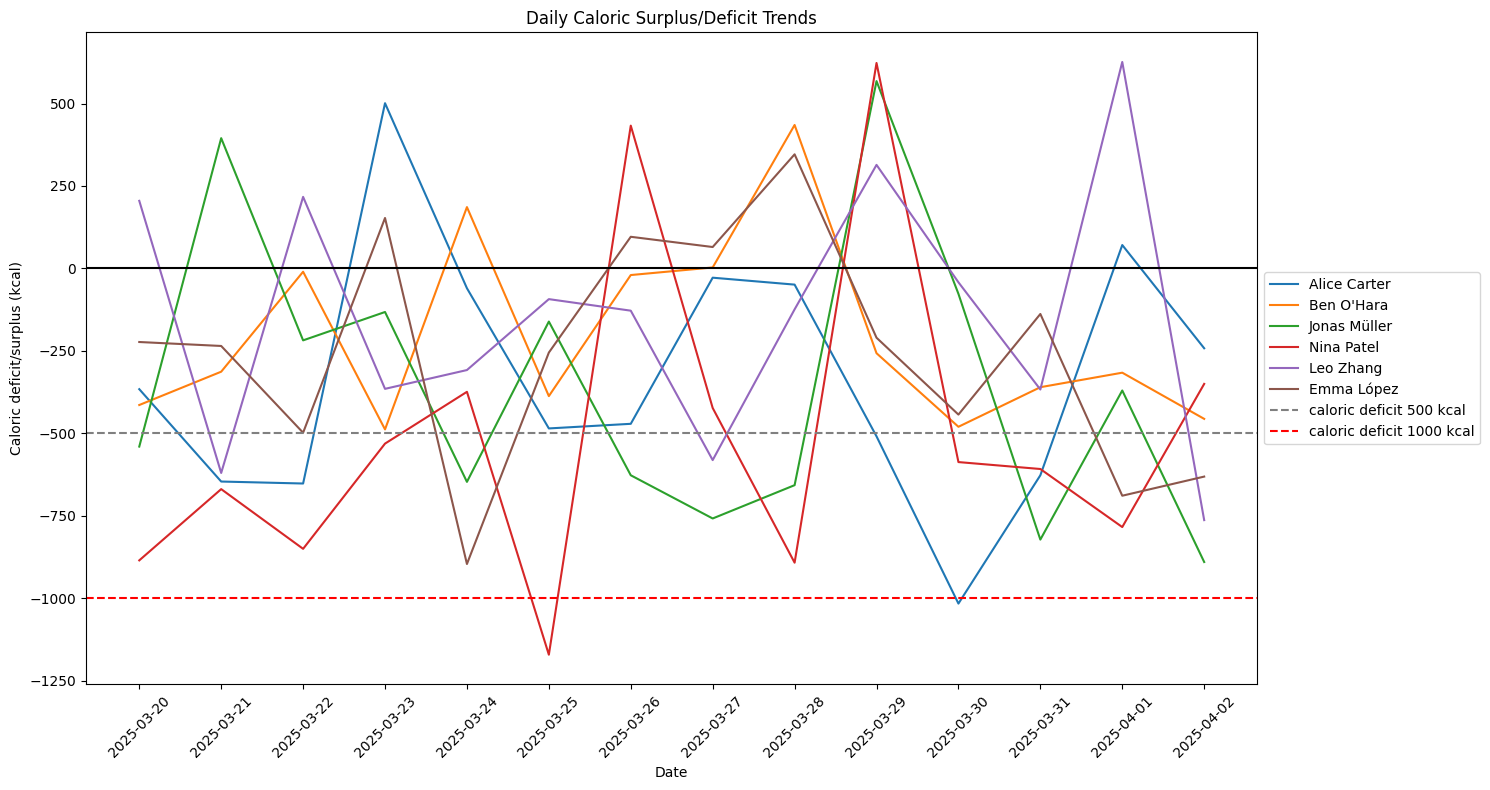

In [114]:
plt.figure(figsize = (15,8))

for name in caloric['crew_member'].unique():
    individual = caloric[caloric['crew_member'] == name]
    plt.plot(individual['date'], individual['cal_diff'], label = name)

plt.axhline(y = 0, color='black', linestyle='-')
plt.axhline(y = -500, color='grey', linestyle='--', label='caloric deficit 500 kcal')
plt.axhline(y = -1000, color='red', linestyle='--', label='caloric deficit 1000 kcal')
plt.xlabel("Date")
plt.ylabel("Caloric deficit/surplus (kcal)")
plt.title("Daily Caloric Surplus/Deficit Trends")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()